In [95]:
import numpy as np
import pandas as pd
import missingno as msno
import warnings
import openpyxl
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_excel("dataset.xlsx")

In [97]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [98]:
df.drop("UDI", axis=1, inplace=True)


In [99]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,831,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,4061,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,4801,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,2604,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,714,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.004930,2.000259,295.300000,298.300000,300.100000,301.500000,304.500000
Process temperature [K],10000.0,310.005560,1.483734,305.700000,308.800000,310.100000,311.100000,313.800000
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.000000,1423.000000,1503.000000,1612.000000,2886.000000
Torque [Nm],10000.0,39.986910,9.968934,3.800000,33.200000,40.100000,46.800000,76.600000
Tool wear [min],10000.0,107.951000,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000
Target,10000.0,0.033900,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
operational_hours,10000.0,2599.831500,1434.530378,111.000000,1335.000000,2545.000000,3909.000000,4995.000000
RUL,10000.0,2359.175195,1434.573018,-43.059499,1040.807703,2437.613362,3612.921791,4869.004338
Vibration (mm/s),10000.0,0.002787,0.997068,-1.732027,-0.864390,0.013734,0.862230,1.731966
Pressure (Pa),10000.0,0.001674,0.995062,-1.736148,-0.866009,0.006039,0.860559,1.716001


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
 9   operational_hours        10000 non-null  int64  
 10  RUL                      10000 non-null  float64
 11  Vibration (mm/s)         10000 non-null  float64
 12  Pressure (Pa)            10000 non-null  float64
 13  Maintenance Required     10000 non-null  int64  
 14  Temp_Change            

In [102]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'operational_hours', 'RUL', 'Vibration (mm/s)',
       'Pressure (Pa)', 'Maintenance Required', 'Temp_Change', 'Vib_Change',
       'Temperature_Mean', 'Vibration_Mean', 'Pressure_Mean', 'RPM_Mean'],
      dtype='object')

In [103]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


In [104]:
num_cols = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Vibration (mm/s)','Pressure (Pa)','Vib_Change',
       'Temperature_Mean', 'Vibration_Mean', 'RPM_Mean']
cat_cols = ['Type', 'Failure type']
label = 'Failure Type'

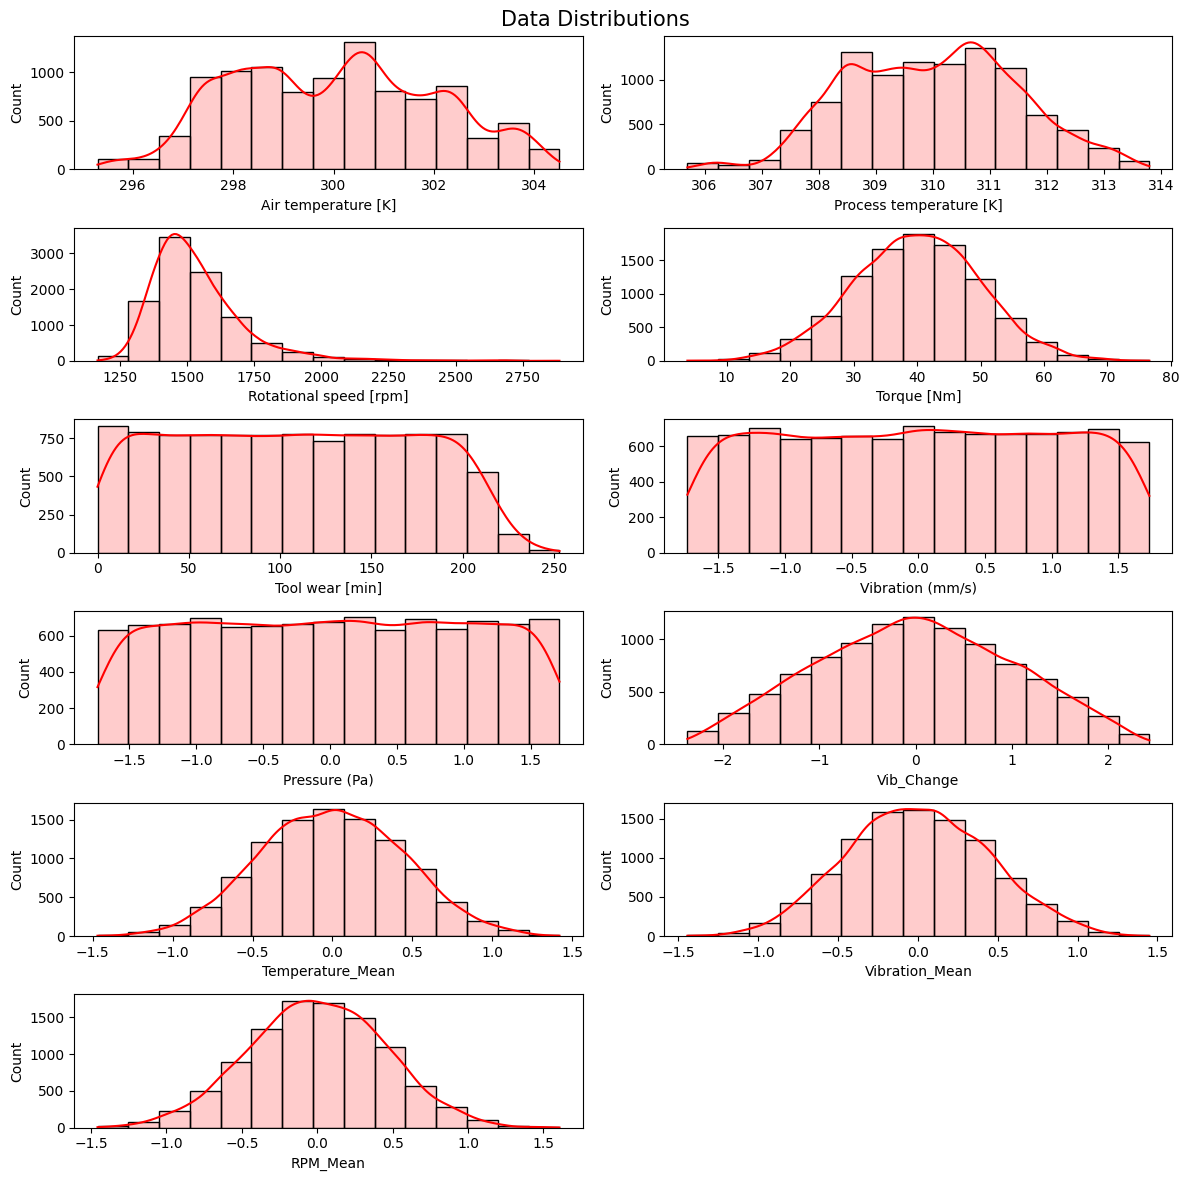

In [105]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(6,2, i+1)
    sns.histplot(df, x = col, kde = True, alpha = 0.2, color = 'red', bins = 15)
plt.suptitle("Data Distributions", fontsize = 15)
plt.tight_layout()
plt.show()

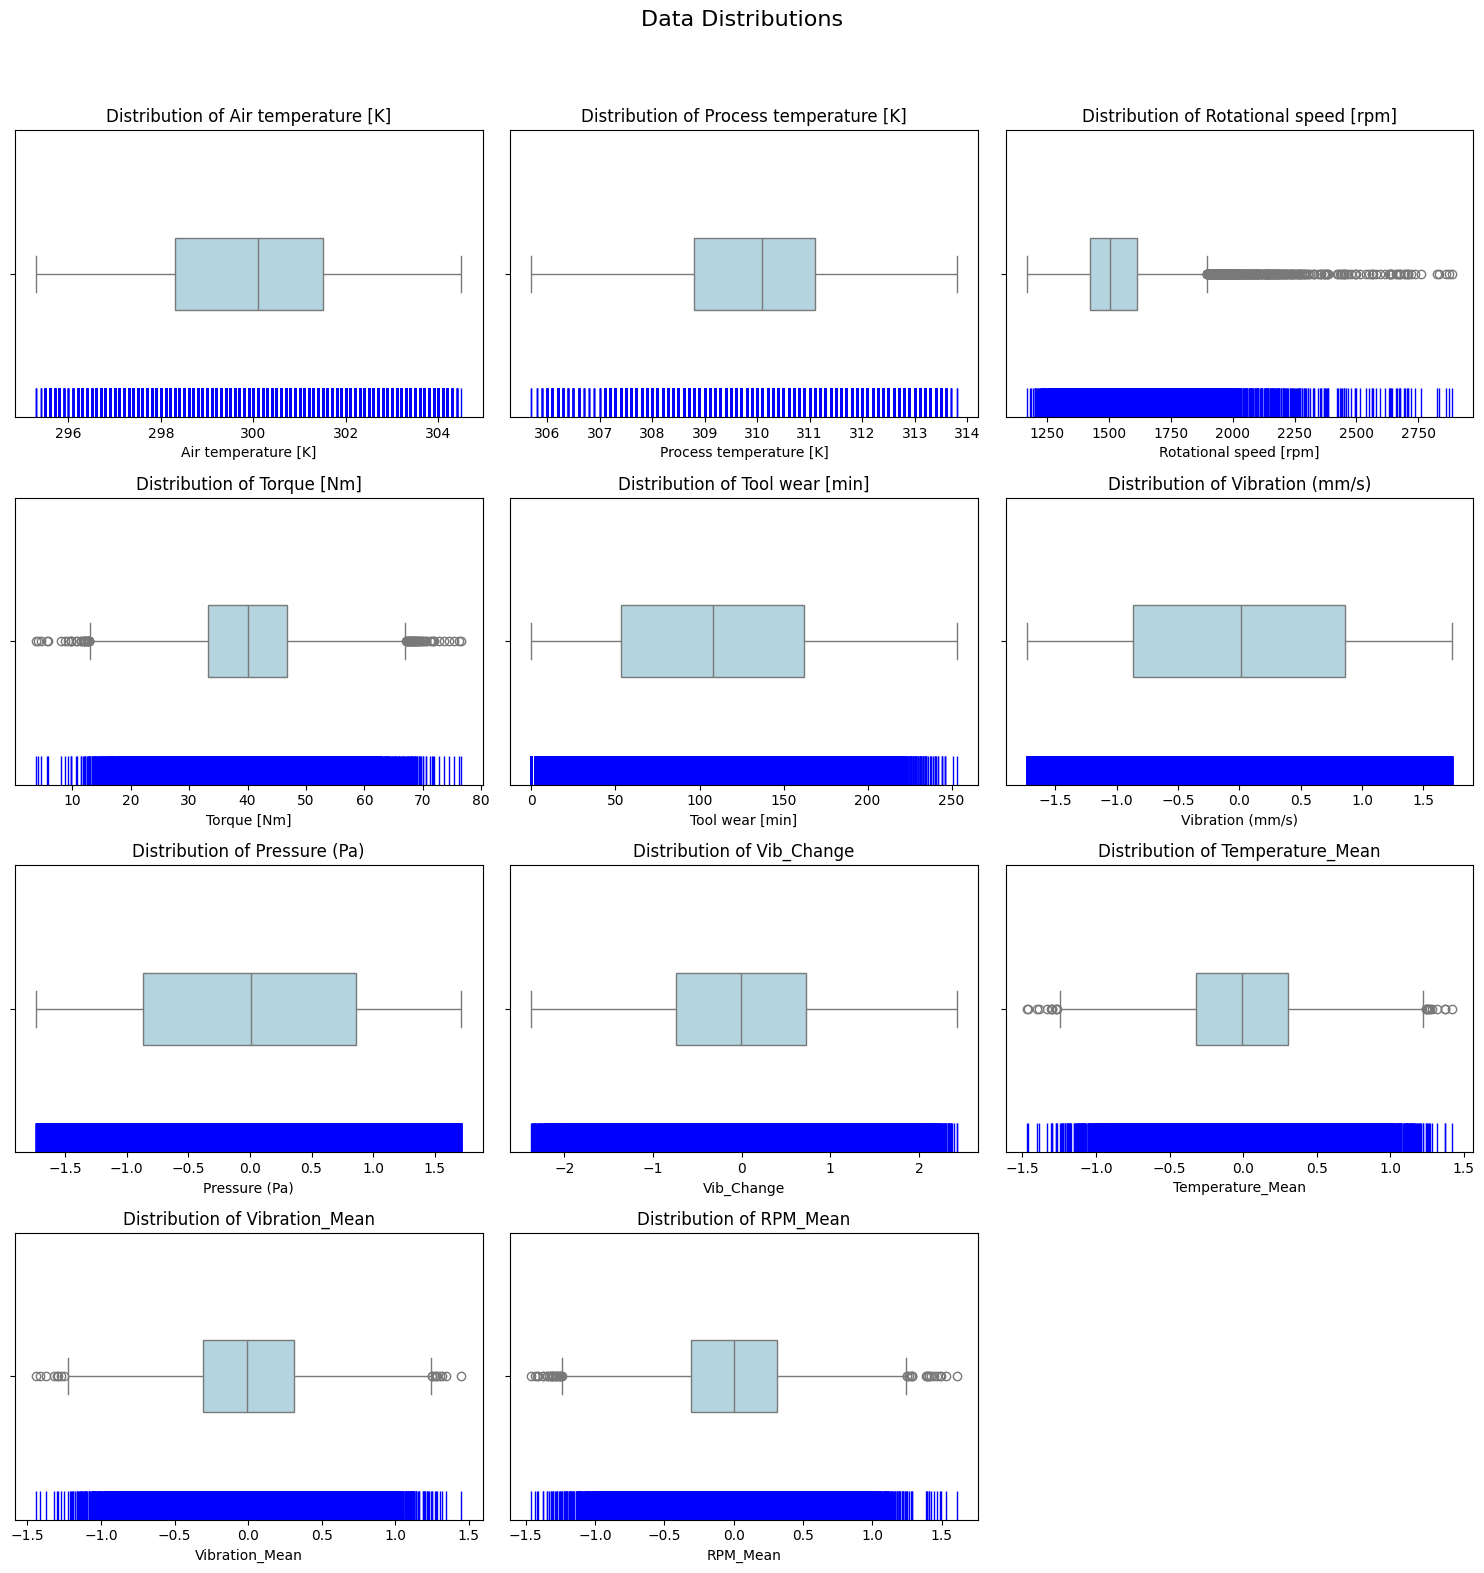

In [106]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, 4 * n_rows))  
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.rugplot(data=df, x=col, height=0.1, color='blue')
    sns.boxplot(data=df, x=col, width=0.25, color='lightblue')
    plt.title(f'Distribution of {col}')

plt.suptitle("Data Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


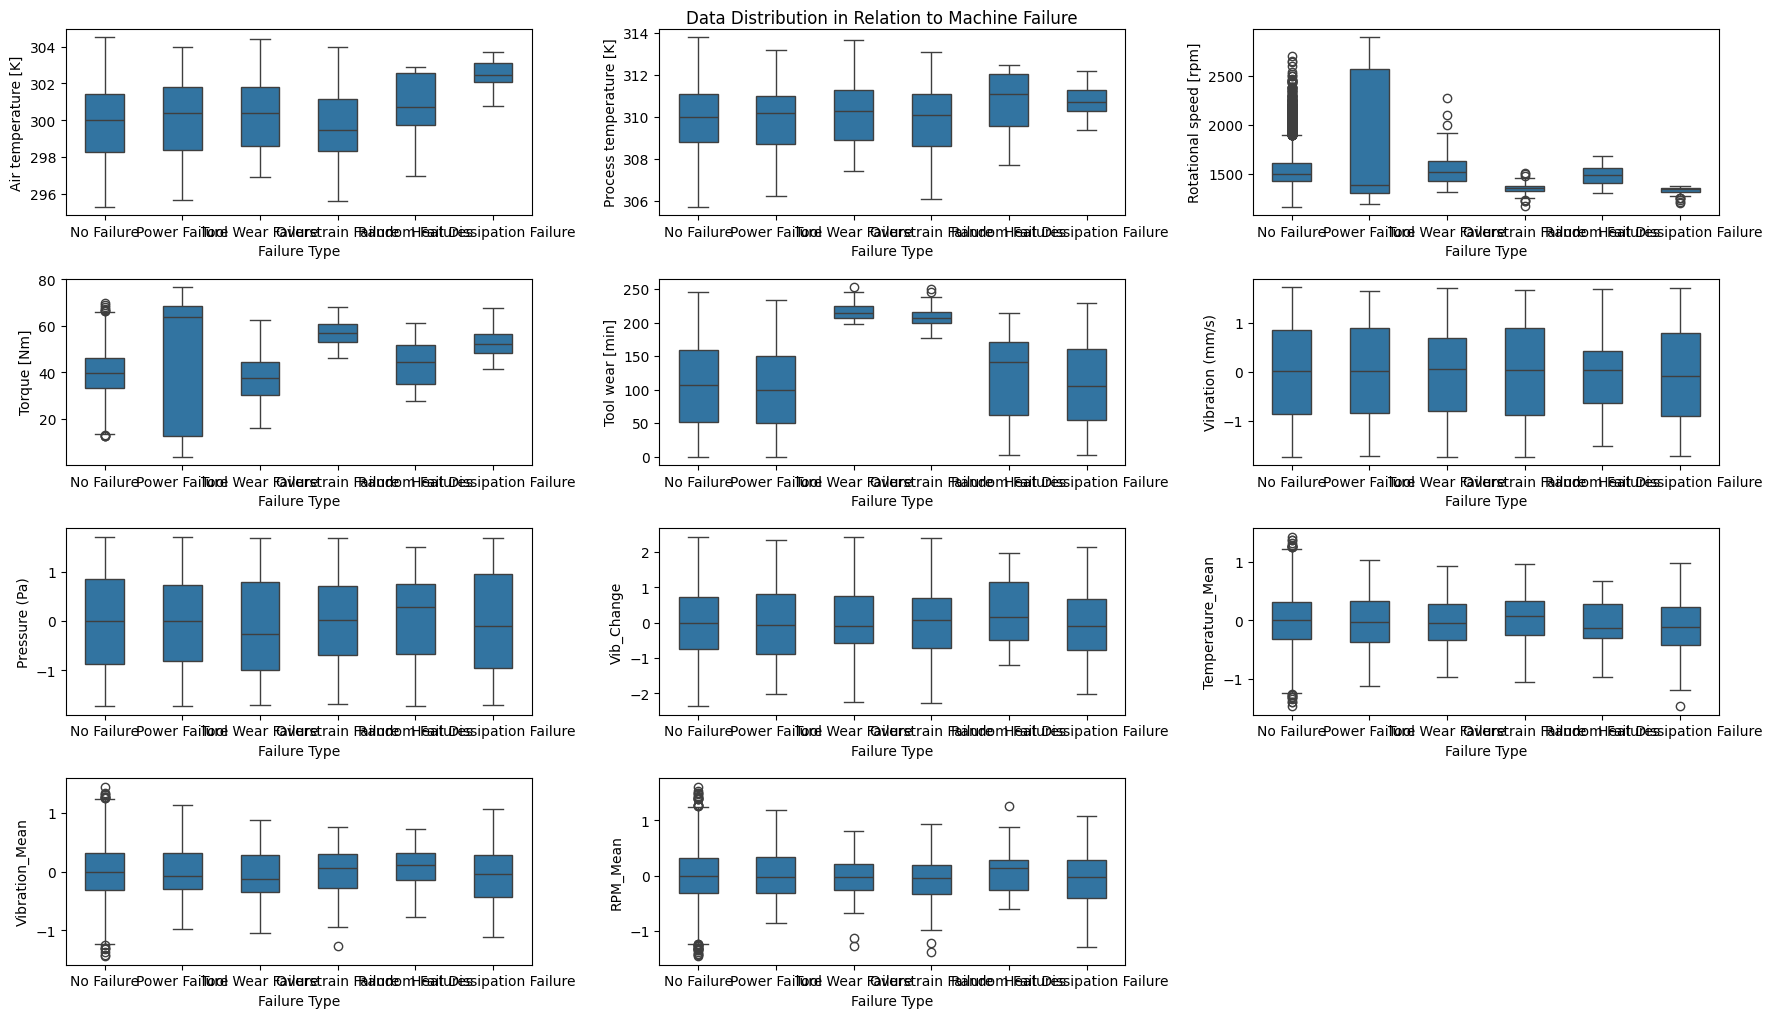

In [107]:
plt.figure(figsize = (18, 15))
for i, col in enumerate(num_cols):
    plt.subplot(6,3, i+1)
    sns.boxplot(df, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

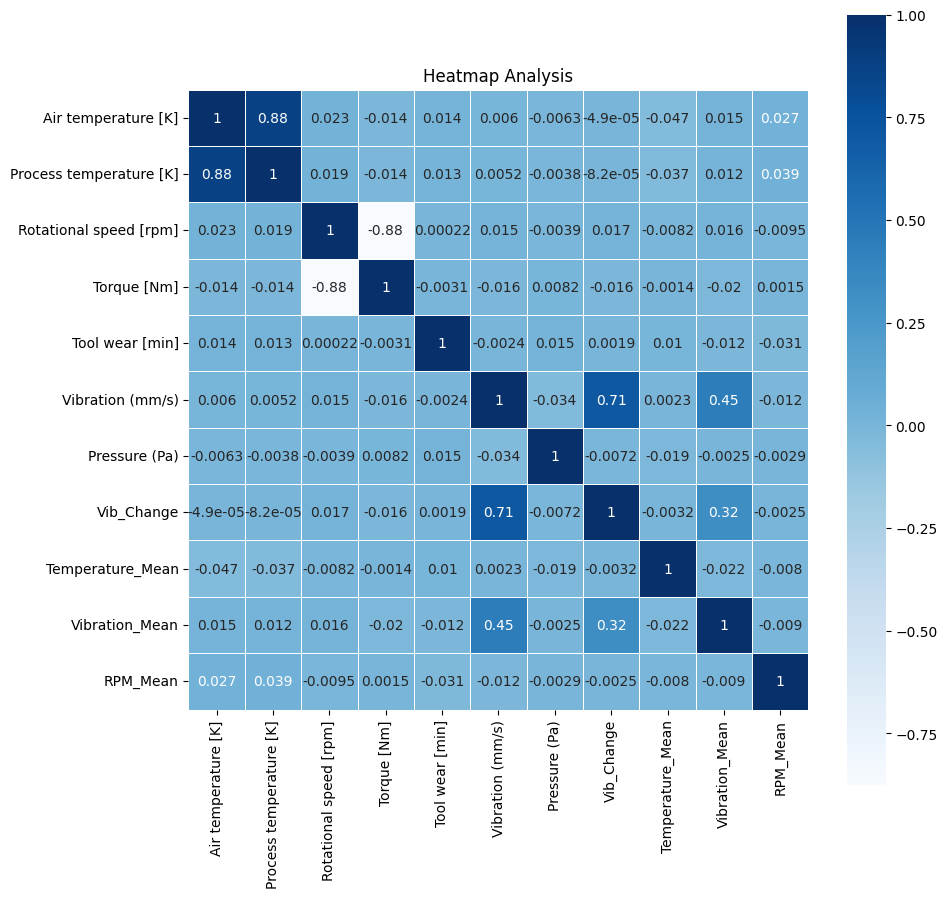

In [108]:
plt.figure(figsize = (10,10))
sns.heatmap(df[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

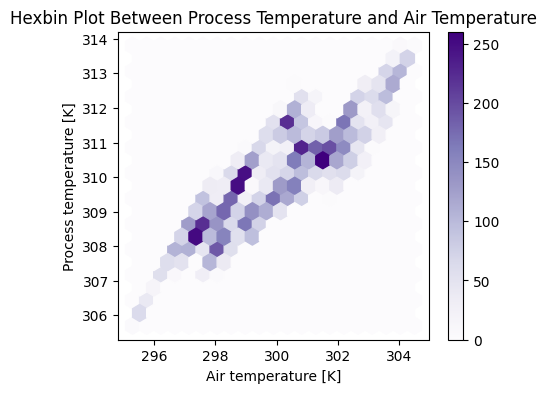

In [109]:
df.plot.hexbin(x='Air temperature [K]', y='Process temperature [K]', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

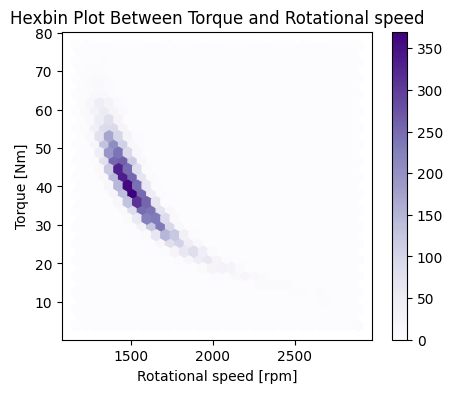

In [110]:
df.plot.hexbin(x='Rotational speed [rpm]',  y='Torque [Nm]', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

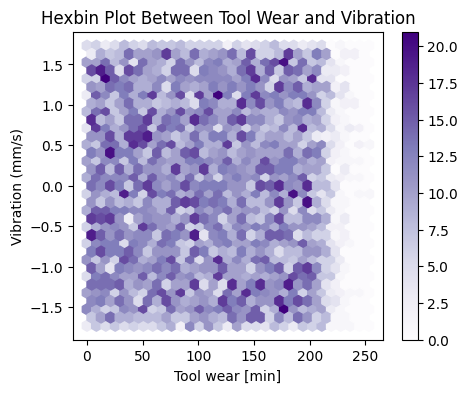

In [111]:
df.plot.hexbin(x='Tool wear [min]',  y='Vibration (mm/s)', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Tool Wear and Vibration")
plt.show()

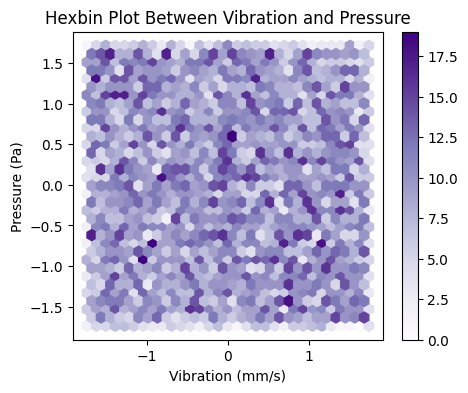

In [112]:
df.plot.hexbin(x='Vibration (mm/s)',  y='Pressure (Pa)', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Vibration and Pressure")
plt.show()

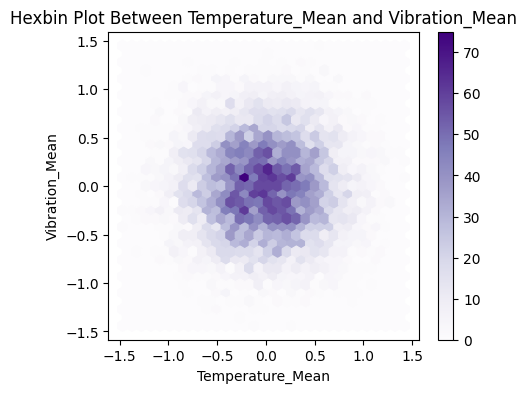

In [113]:
df.plot.hexbin(x='Temperature_Mean',  y='Vibration_Mean', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Temperature_Mean and Vibration_Mean")
plt.show() 

In [114]:
type_machine_failure = df[['Type', 'Failure Type']].pivot_table(index = 'Type', columns='Failure Type', aggfunc= lambda x: len(x), margins = True)

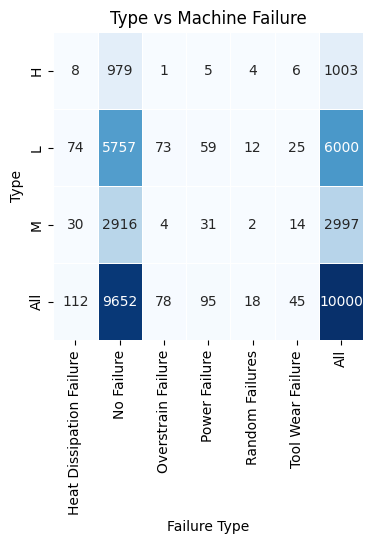

In [115]:
plt.figure(figsize=(4,4))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

Exploratory Data Analysis and Data Preprocessing

In [116]:
df = pd.read_excel("dataset.xlsx")

In [117]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [118]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
9995,9996,L57175,M,298.8,308.4,1604,29.5,14,0,No Failure,...,2030.402370,-1.162264,1.115479,0,-0.452075,0.180631,0.037652,-0.191070,0.568697,-0.169609
9996,9997,L57176,H,298.9,308.4,1632,31.8,17,0,No Failure,...,774.427635,0.255799,1.057286,0,-0.374492,1.001751,0.174310,-0.021900,0.564288,0.053472
9997,9998,L57177,M,299.0,308.6,1645,33.4,22,0,No Failure,...,2518.885311,1.583680,1.640320,1,0.882513,0.938043,0.024438,0.115082,0.094971,-0.055067
9998,9999,L57178,H,299.0,308.7,1408,48.5,25,0,No Failure,...,2437.613362,-1.174475,-0.557183,1,-1.794610,-1.948467,-0.230755,0.009933,-0.313748,-0.005185
9999,10000,L57179,M,299.0,308.7,1500,40.2,30,0,No Failure,...,1715.385585,-0.458089,-0.412418,1,1.929279,0.506062,-0.221213,0.385930,0.081427,-0.133584


In [119]:
df=pd.read_excel('dataset.xlsx',header=None) 
df.head
features=df.loc[0,:]
print(features)

0                         UDI
1                  Product ID
2                        Type
3         Air temperature [K]
4     Process temperature [K]
5      Rotational speed [rpm]
6                 Torque [Nm]
7             Tool wear [min]
8                      Target
9                Failure Type
10          operational_hours
11                        RUL
12           Vibration (mm/s)
13              Pressure (Pa)
14       Maintenance Required
15                Temp_Change
16                 Vib_Change
17           Temperature_Mean
18             Vibration_Mean
19              Pressure_Mean
20                   RPM_Mean
Name: 0, dtype: object


Data shape, Data types and NaN values

In [120]:
#shape of the dataset
df.shape

(10001, 21)

In [121]:
#dtypes check the data types of our features
#Attribute in Dataframe to check the type of each column in the Dataframe
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
dtype: object

In [122]:
#Get detailed information about the Dataframe about the type
#and null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10001 non-null  object
 1   1       10001 non-null  object
 2   2       10001 non-null  object
 3   3       10001 non-null  object
 4   4       10001 non-null  object
 5   5       10001 non-null  object
 6   6       10001 non-null  object
 7   7       10001 non-null  object
 8   8       10001 non-null  object
 9   9       10001 non-null  object
 10  10      10001 non-null  object
 11  11      10001 non-null  object
 12  12      10001 non-null  object
 13  13      10001 non-null  object
 14  14      10001 non-null  object
 15  15      10001 non-null  object
 16  16      10001 non-null  object
 17  17      10001 non-null  object
 18  18      10001 non-null  object
 19  19      10001 non-null  object
 20  20      10001 non-null  object
dtypes: object(21)
memory usage: 1.6+ MB


In [123]:
#Checking the total null values in our features
df.notnull().sum()

0     10001
1     10001
2     10001
3     10001
4     10001
5     10001
6     10001
7     10001
8     10001
9     10001
10    10001
11    10001
12    10001
13    10001
14    10001
15    10001
16    10001
17    10001
18    10001
19    10001
20    10001
dtype: int64

In [124]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [126]:
df.describe().T

,count,unique,top,freq
0,10001,10001,UDI,1
1,10001,10001,Product ID,1
2,10001,4,L,6000
3,10001.0,94.0,300.7,279.0
4,10001.0,83.0,310.6,317.0
5,10001,942,1452,48
6,10001.0,578.0,40.2,52.0
7,10001,247,0,120
8,10001,3,0,9661
9,10001,7,No Failure,9652


Index of the Columns

In [127]:
df.index

RangeIndex(start=0, stop=10001, step=1)

In [128]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20],
      dtype='int64')

After data cleaning and processing the final list is as follows

In [129]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
1,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
2,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
3,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.71749,0.114603,0.068012,-0.185253,0.32043
4,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,L57175,M,298.8,308.4,1604,29.5,14,0,No Failure,...,2030.40237,-1.162264,1.115479,0,-0.452075,0.180631,0.037652,-0.19107,0.568697,-0.169609
9997,9997,L57176,H,298.9,308.4,1632,31.8,17,0,No Failure,...,774.427635,0.255799,1.057286,0,-0.374492,1.001751,0.17431,-0.0219,0.564288,0.053472
9998,9998,L57177,M,299,308.6,1645,33.4,22,0,No Failure,...,2518.885311,1.58368,1.64032,1,0.882513,0.938043,0.024438,0.115082,0.094971,-0.055067
9999,9999,L57178,H,299,308.7,1408,48.5,25,0,No Failure,...,2437.613362,-1.174475,-0.557183,1,-1.79461,-1.948467,-0.230755,0.009933,-0.313748,-0.005185


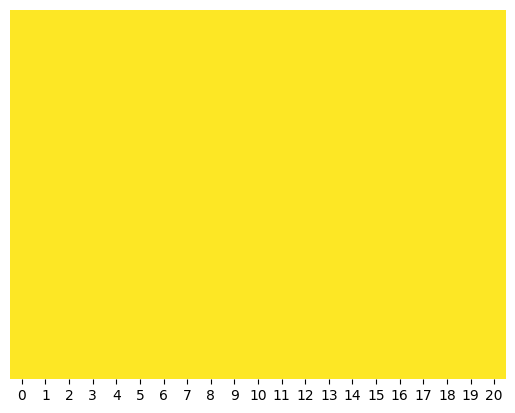

In [130]:
#visualizing the null values in the dataset using a heatmap
#visualization helps to find the distribution of null values in the data
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis_r')
plt.show()

In [131]:
df1 = pd.read_excel("dataset.xlsx")

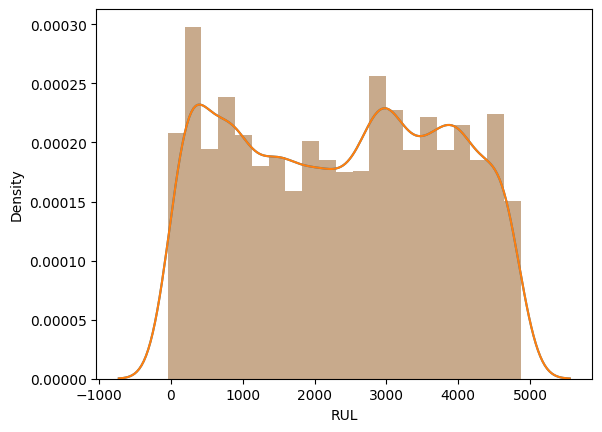

In [132]:
#let's check the distribution of Price feature
# Why we do this?  This distribution should be retained after filling the missing values
sns.distplot(df1['RUL'], kde=True)
sns.distplot(df1['RUL'], hist = True)
plt.show()


In [133]:
#checking the distribution of Price and Rating after imputation
df['operational_hours'] = df1['RUL'].fillna(df1['RUL'].mean())
df['operational_hours'] = df1['RUL'].fillna(25)
#using DataFrame's plot function
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,operational_hours
0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,4167.779109
1,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714,937.137258
2,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727,197.222359
3,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,-0.712681,1.597605,1,-0.274656,-0.71749,0.114603,0.068012,-0.185253,0.32043,2393.654227
4,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668,4285.083772


In [134]:
df1['Maintenance Required'].value_counts()

Maintenance Required
0    5011
1    4989
Name: count, dtype: int64

In [135]:
#we can either impute Embarked feature with mode value as it is categorical variable or
# we can drop the rows where there is missing values as it is very less . For now we will use mode 
df1.fillna('NA',inplace=True)
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


Treating outliers

In [136]:
#making the copy of data to showcase how to drop outlier values
df2=df1.copy()

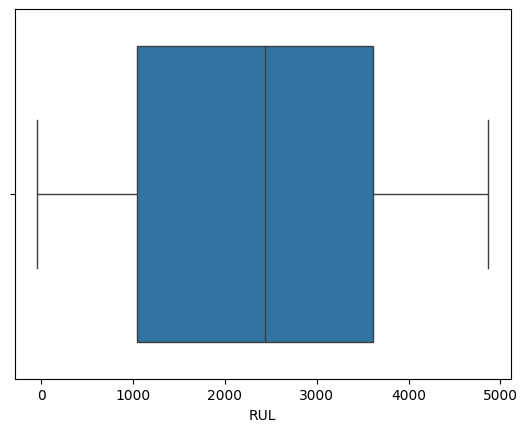

In [137]:
# Boxplot helps to identify the outliers in any feature
#outliers in Rating
#sns.boxplot(df['Rating'])
sns.boxplot(x='RUL', data=df2)
plt.show()

In [138]:
numeric_df2 = df2.select_dtypes(include=['number'])

# Calculating IQR (Inter-Quartile Range) for numeric columns only
Q1 = numeric_df2.quantile(0.25)  # Lower quartile
Q3 = numeric_df2.quantile(0.75)  # Upper quartile
IQR = Q3 - Q1                    # Inter-Quartile Range

print(IQR)

UDI                        4999.500000
Air temperature [K]           3.200000
Process temperature [K]       2.300000
Rotational speed [rpm]      189.000000
Torque [Nm]                  13.600000
Tool wear [min]             109.000000
Target                        0.000000
operational_hours          2574.000000
RUL                        2572.114088
Vibration (mm/s)              1.726620
Pressure (Pa)                 1.726568
Maintenance Required          1.000000
Temp_Change                   1.450693
Vib_Change                    1.464838
Temperature_Mean              0.623778
Vibration_Mean                0.622044
Pressure_Mean                 0.626436
RPM_Mean                      0.621786
dtype: float64


In [139]:
# Calculate outlier bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df2_filtered = numeric_df2[(numeric_df2 >= lower_bound) & (numeric_df2 <= upper_bound)].dropna()

# Display the shape of the filtered DataFrame
print("Original shape:", df2.shape)
print("Filtered shape:", df2_filtered.shape)

Original shape: (10000, 21)
Filtered shape: (9187, 18)


Treating Outliers

In [140]:
Q3 = df2['RUL'].quantile(0.75)
Q1 = df2['RUL'].quantile(0.25)
#IQR=data['Price'].quantile(0.75)-data['Price'].quantile(0.25)
IQR=Q3-Q1
print(IQR)

2572.1140880000003


In [141]:
lower_bridge=Q1-(IQR*1.5)
upper_bridge=Q3+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-2817.3634290000005
7471.092923


In [142]:
df2[df2.RUL>=3200]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure,...,3307.410677,1.301523,-0.277087,0,0.175592,-0.263934,0.515959,0.020799,-0.229460,0.229904
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure,...,3282.465782,1.592567,0.023596,0,-1.417390,0.205587,0.489662,-0.209331,-0.435341,-0.367288
10,11,H29424,H,298.4,308.9,1782,23.9,24,0,No Failure,...,3998.219365,-1.363115,-1.553024,0,0.997338,-2.088007,0.273847,-0.245427,-0.481540,-0.831001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,L57161,L,298.7,308.5,1353,47.0,190,0,No Failure,...,4357.411843,-1.003783,0.140029,1,0.899039,-1.109071,0.820348,-0.502897,-0.684562,0.743037
9986,9987,L57166,M,298.8,308.6,1507,42.3,207,0,No Failure,...,3641.902964,1.030572,-0.204323,1,1.392025,1.031695,0.997172,-0.400058,0.579348,0.195726
9987,9988,L57167,M,298.8,308.6,1500,37.1,210,0,No Failure,...,4587.093566,-0.454566,-0.757529,0,-0.464498,-1.049166,0.471546,-0.870102,0.379769,0.021141
9989,9990,L57169,M,298.8,308.5,1577,33.2,0,0,No Failure,...,3959.518032,-1.348438,1.456175,0,1.137205,-0.357061,-0.160340,-0.935916,0.157789,0.047006


In [143]:
df2[(df2.RUL>=1500) & (df2.RUL<=3200)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure,...,3177.235519,1.408758,-1.677227,0,-0.508874,0.099705,0.676519,0.922970,-1.023291,0.718558
14,15,L47194,L,298.6,309.2,2035,19.6,40,0,No Failure,...,2738.403990,1.412085,-0.207396,0,-2.087548,0.890947,-0.483384,-0.058830,-0.749256,0.216048
15,16,L47195,L,298.6,309.2,1542,48.4,42,0,No Failure,...,2464.962193,0.971588,-0.111577,1,0.039292,-0.311198,0.068563,-0.138066,-0.979851,0.380472
18,19,H29432,H,298.8,309.2,1306,54.5,50,0,No Failure,...,1639.657411,-1.552834,-1.378253,0,-0.133063,-0.196853,0.966135,-0.214140,-0.688761,0.002205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,0,No Failure,...,3026.186822,-0.384836,0.970508,1,-0.723238,0.680704,-0.336872,-0.949824,-0.298100,0.259002
9995,9996,L57175,M,298.8,308.4,1604,29.5,14,0,No Failure,...,2030.402370,-1.162264,1.115479,0,-0.452075,0.180631,0.037652,-0.191070,0.568697,-0.169609
9997,9998,L57177,M,299.0,308.6,1645,33.4,22,0,No Failure,...,2518.885311,1.583680,1.640320,1,0.882513,0.938043,0.024438,0.115082,0.094971,-0.055067
9998,9999,L57178,H,299.0,308.7,1408,48.5,25,0,No Failure,...,2437.613362,-1.174475,-0.557183,1,-1.794610,-1.948467,-0.230755,0.009933,-0.313748,-0.005185


In [144]:
df2[(df2.RUL<=1500)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure,...,1092.711130,1.267597,-0.286580,0,0.542867,2.042189,0.575777,1.449112,-0.770002,0.563833
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure,...,126.650001,1.675116,-1.632714,0,1.109468,0.188148,0.739596,0.546857,-0.730790,0.609096
12,13,M14872,M,298.6,309.1,1339,51.1,34,0,No Failure,...,246.702139,-0.955173,0.873939,1,0.095615,-0.341483,-0.564303,0.345717,-0.236519,-0.543720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,L57168,L,298.9,308.6,1771,24.1,213,0,No Failure,...,185.454154,-0.843019,1.431909,0,-0.585901,-0.274432,0.021613,-0.906414,0.787104,-0.013037
9991,9992,L57171,M,298.9,308.4,1827,26.1,5,0,No Failure,...,774.427635,-1.319648,-1.202218,0,-1.222344,-0.660398,-0.436721,-1.105310,-0.269106,0.115362
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,0,No Failure,...,-43.059499,-0.636126,1.279147,1,-0.196838,0.482846,-0.296799,-0.790220,0.182795,0.162934
9994,9995,L57174,L,298.8,308.3,1634,27.9,12,0,No Failure,...,960.234514,-1.417982,-0.823271,1,1.156372,-0.301983,-0.016283,-0.383048,0.486526,-0.282305


Analyse the relation between target variables and the categorical variables in the dataset


The categorical variables considered are operational_hours and RUL

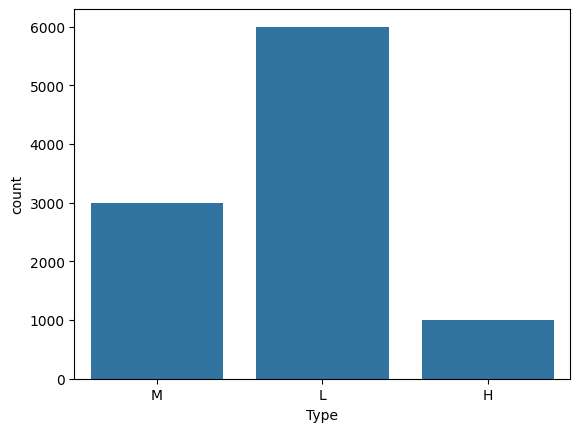

In [145]:
# Number of operational_hours in the dataset using plot
# Tells how operational_hours is distributed over the dataset
sns.countplot(x='Type', data=df2)
plt.show()

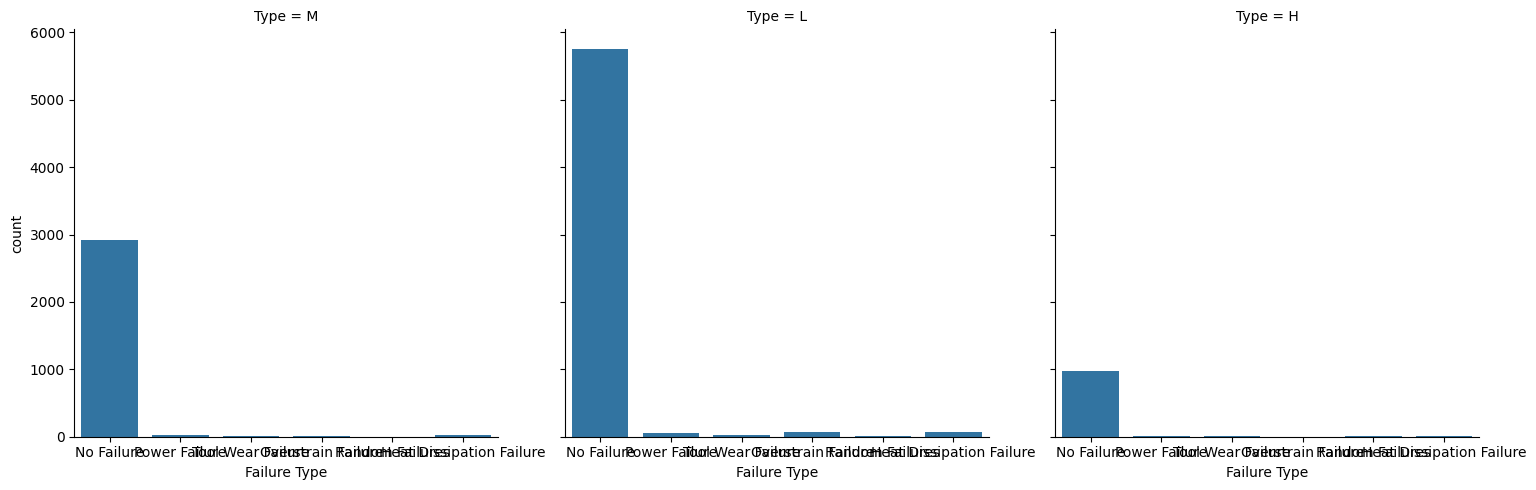

In [167]:
sns.catplot(x='Failure Type', col='Type', kind='count', data=df2)   #factor plot()
plt.show()

Final Conclusion

In [147]:
data = df2[~(df2.isnull())]
data.drop
print(data[~(data.isnull())])

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     L57175    M                298.8                    308.4   
9996   9997     L57176    H                298.9                    308.4   
9997   9998     L57177    M                299.0                    308.6   
9998   9999     L57178    H                299.0                    308.7   
9999  10000     L57179    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

In [148]:
# Save cleaned and processed data to a CSV file
df2.to_csv('final_dataset.csv', index=False)

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [150]:
file_path = 'final_dataset.csv'  
data = pd.read_csv(file_path)

In [151]:
data = data.select_dtypes(include=[float, int])  
data = data.fillna(data.median())  

In [152]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [153]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

IsolationForest(contamination=0.01)

In [154]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

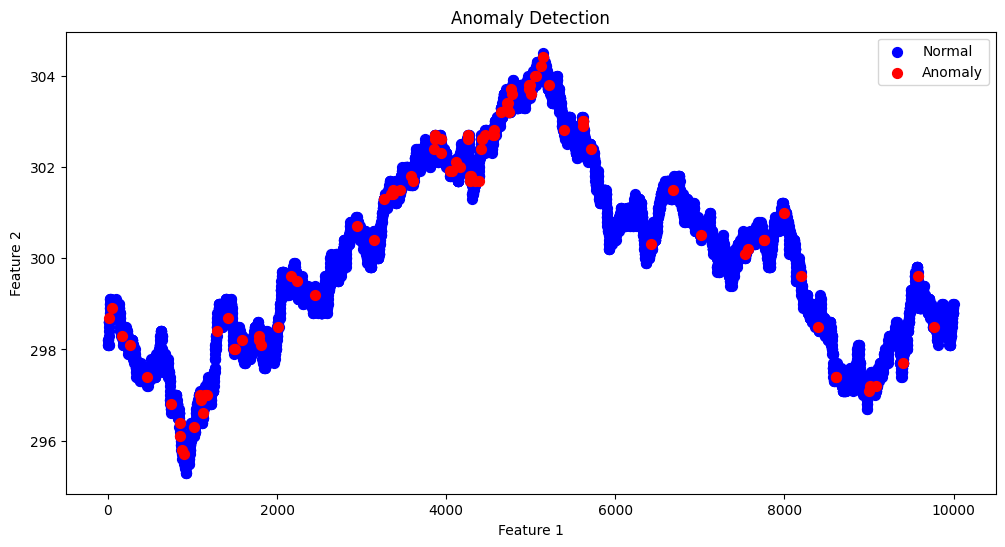

In [155]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting normal points
normal_data = data[data['Anomaly'] == 1]
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], c='blue', label='Normal', s=50)

# Plotting anomalies
anomalies_data = data[data['Anomaly'] == -1]
plt.scatter(anomalies_data.iloc[:, 0], anomalies_data.iloc[:, 1], c='red', label='Anomaly', s=50)

plt.title('Anomaly Detection')
plt.xlabel('Feature 1')  # Replace with actual feature names
plt.ylabel('Feature 2')  # Replace with actual feature names
plt.legend()
plt.show()

In [156]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,Anomaly
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,2599.831500,2359.175195,0.002787,0.001674,0.498900,0.000044,-0.000051,-0.004675,0.002883,0.001537,0.000814,0.980000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1434.530378,1434.573018,0.997068,0.995062,0.500024,1.005807,1.005003,0.444724,0.441622,0.448764,0.452862,0.199007
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,111.000000,-43.059499,-1.732027,-1.736148,0.000000,-2.431814,-2.370071,-1.470536,-1.440718,-1.312040,-1.457290,-1.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1335.000000,1040.807703,-0.864390,-0.866009,0.000000,-0.722539,-0.734620,-0.319464,-0.307236,-0.313460,-0.306783,1.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,2545.000000,2437.613362,0.013734,0.006039,0.000000,-0.001287,-0.004294,-0.005249,-0.004721,-0.000481,-0.000567,1.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,3909.000000,3612.921791,0.862230,0.860559,1.000000,0.728154,0.730219,0.304314,0.314809,0.312976,0.315003,1.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,4995.000000,4869.004338,1.731966,1.716001,1.000000,2.409244,2.424051,1.420633,1.449112,1.430085,1.606263,1.000000


In [157]:
from sklearn.svm import OneClassSVM

In [158]:
# Initialize and fit the model
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
model.fit(data)

# Predict anomalies
y_pred = model.predict(data)

In [159]:
import numpy as np
anomaly_values=data.iloc[np.where(y_pred==-1)]
print(anomaly_values)

       UDI  Air temperature [K]  Process temperature [K]  \
0        1                298.1                    308.6   
5        6                298.1                    308.6   
6        7                298.1                    308.6   
8        9                298.3                    308.7   
9       10                298.5                    309.0   
...    ...                  ...                      ...   
9990  9991                298.8                    308.5   
9992  9993                298.8                    308.4   
9993  9994                298.8                    308.4   
9995  9996                298.8                    308.4   
9997  9998                299.0                    308.6   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
5                       1425         41.9               11       0   
6                       1558         42.4               14       0   

In [160]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [161]:
# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [162]:
# Preprocess the data
# Example: Drop non-numeric columns and fill missing values if necessary
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

In [163]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [164]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

IsolationForest(contamination=0.01)

In [165]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

In [166]:
# -1 for anomalies, 1 for normal points
print(data)

# Save the results to a new CSV file
output_file = 'C:/Users/manis/OneDrive/Desktop/HACKERA/results.csv'
data.to_csv(output_file, index=False)

        UDI  Air temperature [K]  Process temperature [K]  \
0         1                298.1                    308.6   
1         2                298.2                    308.7   
2         3                298.1                    308.5   
3         4                298.2                    308.6   
4         5                298.2                    308.7   
...     ...                  ...                      ...   
9995   9996                298.8                    308.4   
9996   9997                298.9                    308.4   
9997   9998                299.0                    308.6   
9998   9999                299.0                    308.7   
9999  10000                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                